In [1]:
import numpy as np
import pandas as pd
from pathlib import Path
from collections import Counter
from matplotlib import pyplot as plt
import psycopg2
from sqlalchemy import create_engine

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
salary_df = pd.read_csv("adultdata.txt.data", sep=",", header=None)
salary_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [4]:
salary_df.columns = ['Age', 'WorkClass', 'Fnlwgt', 'Education', 'EducationNum', 'MaritalStatus', 'Occupation', 'Relationship',
                    'Race', 'Sex', 'Capital-Gain', 'Capital-Loss', 'HoursPerWeek', 'NativeCountry', 'Income']
salary_df

,Age,WorkClass,Fnlwgt,Education,EducationNum,MaritalStatus,Occupation,Relationship,Race,Sex,Capital-Gain,Capital-Loss,HoursPerWeek,NativeCountry,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [27]:
#Exporting a Dataframe as a csv
salary_df.to_csv('Salary.csv')

In [5]:
salary_df.Education.unique()

array([' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th',
       ' Some-college', ' Assoc-acdm', ' Assoc-voc', ' 7th-8th',
       ' Doctorate', ' Prof-school', ' 5th-6th', ' 10th', ' 1st-4th',
       ' Preschool', ' 12th'], dtype=object)

In [6]:
salary_df.Occupation.unique()

array([' Adm-clerical', ' Exec-managerial', ' Handlers-cleaners',
       ' Prof-specialty', ' Other-service', ' Sales', ' Craft-repair',
       ' Transport-moving', ' Farming-fishing', ' Machine-op-inspct',
       ' Tech-support', ' ?', ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

In [7]:
salary_df.MaritalStatus.unique()

array([' Never-married', ' Married-civ-spouse', ' Divorced',
       ' Married-spouse-absent', ' Separated', ' Married-AF-spouse',
       ' Widowed'], dtype=object)

In [8]:
salary_df.WorkClass.unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [9]:
salary_df.Relationship.unique()

array([' Not-in-family', ' Husband', ' Wife', ' Own-child', ' Unmarried',
       ' Other-relative'], dtype=object)

In [10]:
# Generate our categorical variable lists
categories = salary_df.dtypes[salary_df.dtypes == "object"].index.tolist()
categories

['WorkClass',
 'Education',
 'MaritalStatus',
 'Occupation',
 'Relationship',
 'Race',
 'Sex',
 'NativeCountry',
 'Income']

In [11]:
from sklearn.preprocessing import OneHotEncoder

# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(salary_df[categories]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(categories)
encode_df

,WorkClass_ ?,WorkClass_ Federal-gov,WorkClass_ Local-gov,WorkClass_ Never-worked,WorkClass_ Private,WorkClass_ Self-emp-inc,WorkClass_ Self-emp-not-inc,WorkClass_ State-gov,WorkClass_ Without-pay,Education_ 10th,...,NativeCountry_ Scotland,NativeCountry_ South,NativeCountry_ Taiwan,NativeCountry_ Thailand,NativeCountry_ Trinadad&Tobago,NativeCountry_ United-States,NativeCountry_ Vietnam,NativeCountry_ Yugoslavia,Income_ <=50K,Income_ >50K
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
32557,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
32558,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
32559,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [12]:
print (list(encode_df))

['WorkClass_ ?', 'WorkClass_ Federal-gov', 'WorkClass_ Local-gov', 'WorkClass_ Never-worked', 'WorkClass_ Private', 'WorkClass_ Self-emp-inc', 'WorkClass_ Self-emp-not-inc', 'WorkClass_ State-gov', 'WorkClass_ Without-pay', 'Education_ 10th', 'Education_ 11th', 'Education_ 12th', 'Education_ 1st-4th', 'Education_ 5th-6th', 'Education_ 7th-8th', 'Education_ 9th', 'Education_ Assoc-acdm', 'Education_ Assoc-voc', 'Education_ Bachelors', 'Education_ Doctorate', 'Education_ HS-grad', 'Education_ Masters', 'Education_ Preschool', 'Education_ Prof-school', 'Education_ Some-college', 'MaritalStatus_ Divorced', 'MaritalStatus_ Married-AF-spouse', 'MaritalStatus_ Married-civ-spouse', 'MaritalStatus_ Married-spouse-absent', 'MaritalStatus_ Never-married', 'MaritalStatus_ Separated', 'MaritalStatus_ Widowed', 'Occupation_ ?', 'Occupation_ Adm-clerical', 'Occupation_ Armed-Forces', 'Occupation_ Craft-repair', 'Occupation_ Exec-managerial', 'Occupation_ Farming-fishing', 'Occupation_ Handlers-cleane

In [13]:
# Merge one-hot encoded features and drop the originals
MachineLearningModel_df = salary_df.merge(encode_df, left_index=True, right_index=True)
MachineLearningModel_df = MachineLearningModel_df.drop(categories, 1)
MachineLearningModel_df

,Age,Fnlwgt,EducationNum,Capital-Gain,Capital-Loss,HoursPerWeek,WorkClass_ ?,WorkClass_ Federal-gov,WorkClass_ Local-gov,WorkClass_ Never-worked,...,NativeCountry_ Scotland,NativeCountry_ South,NativeCountry_ Taiwan,NativeCountry_ Thailand,NativeCountry_ Trinadad&Tobago,NativeCountry_ United-States,NativeCountry_ Vietnam,NativeCountry_ Yugoslavia,Income_ <=50K,Income_ >50K
0,39,77516,13,2174,0,40,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,50,83311,13,0,0,13,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,38,215646,9,0,0,40,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,53,234721,7,0,0,40,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,28,338409,13,0,0,40,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,257302,12,0,0,38,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
32557,40,154374,9,0,0,40,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
32558,58,151910,9,0,0,40,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
32559,22,201490,9,0,0,20,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [14]:
X = MachineLearningModel_df.drop(columns=['Income_ <=50K', 'Income_ >50K'])
y = MachineLearningModel_df['Income_ <=50K']
y

0        1.0
1        1.0
2        1.0
3        1.0
4        1.0
        ... 
32556    1.0
32557    0.0
32558    1.0
32559    1.0
32560    0.0
Name: Income_ <=50K, Length: 32561, dtype: float64

In [15]:
#Import dependencies for scaling the data
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#Train/Test/Split data into training and testing groups
X_train, X_test, y_train, y_test = train_test_split(X, y)

#Fit scaler to the training set of features
scaler = StandardScaler().fit(X_train)

#Transforming both the training and testing datasets into scaled data
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [16]:
#Use RandomForestClassifier on scaled data
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=500).fit(X_train_scaled, y_train)

In [21]:
clf.fit(X_train_scaled, y_train)

RandomForestClassifier(n_estimators=500)

In [23]:
y_pred = clf.predict(X_test_scaled)
results = pd.DataFrame({"Prediction": y_pred, "Actual": y_test}).reset_index(drop=True)
results.head(20)

,Prediction,Actual
0,1.0,1.0
1,1.0,1.0
2,0.0,0.0
3,1.0,1.0
4,1.0,1.0
5,1.0,1.0
6,0.0,0.0
7,1.0,1.0
8,1.0,1.0
9,1.0,1.0


In [24]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.8565286819801007


In [25]:
# Display the confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[1216,  719],
       [ 449, 5757]], dtype=int64)

In [26]:
# Print the imbalanced classification report
from imblearn.metrics import classification_report_imbalanced
print(classification_report_imbalanced(y_test, y_pred))

                   pre       rec       spe        f1       geo       iba       sup

        0.0       0.73      0.63      0.93      0.68      0.76      0.57      1935
        1.0       0.89      0.93      0.63      0.91      0.76      0.60      6206

avg / total       0.85      0.86      0.70      0.85      0.76      0.59      8141



[1.50566183e-01 1.56341497e-01 6.22821939e-02 9.73377818e-02
 3.01036334e-02 8.31502635e-02 1.87113427e-03 5.35839622e-03
 5.93814735e-03 2.54746926e-07 1.07694421e-02 6.08218977e-03
 8.68732826e-03 4.64647346e-03 6.71412809e-05 1.66222524e-03
 1.79912934e-03 7.15885928e-04 2.61626318e-04 7.26086267e-04
 1.82654128e-03 1.24532631e-03 2.50556019e-03 3.25841542e-03
 1.22890387e-02 4.27672807e-03 7.64047841e-03 7.70383705e-03
 7.17148026e-05 4.61434230e-03 5.79237019e-03 6.12272923e-03
 3.41812816e-04 6.21661276e-02 7.41885403e-04 2.39903537e-02
 1.61159972e-03 1.70077399e-03 1.99025435e-03 5.77733699e-03
 1.92692743e-05 6.65637097e-03 1.84865586e-02 4.25552615e-03
 3.20885999e-03 4.05393145e-03 6.72036612e-03 1.02174286e-04
 1.52675997e-02 3.18958572e-03 7.28283407e-03 5.21917562e-03
 4.88780967e-03 4.24256911e-02 1.09686866e-02 1.44325508e-03
 8.55524725e-03 5.27487606e-03 9.87313335e-03 1.21403932e-03
 2.81143548e-03 4.75751685e-03 8.73558675e-04 6.56911608e-03
 8.81112640e-03 8.907226

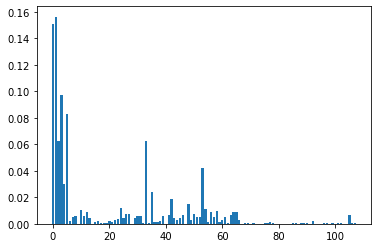

In [17]:
#Finding the most important features of the dataset
features1 = clf.feature_importances_
print(features1)
plt.bar(x = range(len(features1)), height=features1)
plt.show()

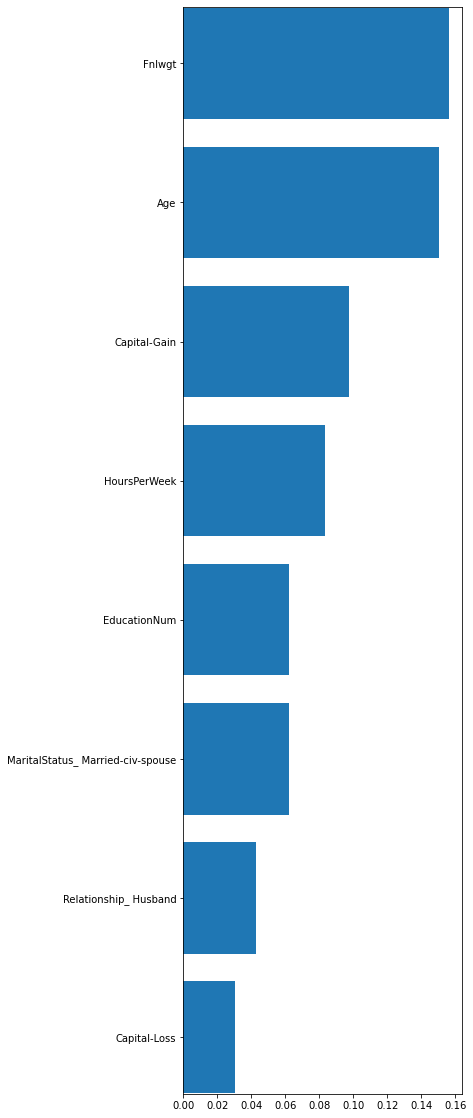

In [19]:
# Use the following code to plot the most important features
features = sorted(zip(X.columns, features1), key = lambda x: x[1])[100:]
cols = [f[0] for f in features]
width = [f[1] for f in features]

fig, ax = plt.subplots()

fig.set_size_inches(5,20)
plt.margins(y=0.001)

ax.barh(y=cols, width=width)

plt.show()